In [1]:

from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('Accident_Information.csv')

# List of columns to keep
columns_to_keep = ['Accident_Severity', 'Day_of_Week', 'Road_Surface_Conditions', 'Speed_limit', 'Urban_or_Rural_Area', 'Weather_Conditions']  # Replace with your actual column names

# Drop all columns except the selected ones
data = data[columns_to_keep]


C:\Users\ezkar\AppData\Local\Temp\ipykernel_41328\541583245.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Accident_Information.csv')


In [3]:
data.describe()

,Speed_limit
count,2.047219e+06
mean,3.884360e+01
std,1.414791e+01
min,0.000000e+00
25%,3.000000e+01
50%,3.000000e+01
75%,5.000000e+01
max,7.000000e+01


In [4]:
encoding_mappings = {
    'Accident_Severity': {'Slight': 1, 'Serious': 2, 'Fatal': 3},
    'Day_of_Week': {'Monday': 1, 'Tuesday': 1, 'Wednesday': 1, 'Thursday': 1, 'Friday': 1, 'Saturday': 2, 'Sunday': 2},
    'Road_Surface_Conditions': {'Dry': 1, 'Wet or damp': 2, 'Frost or ice': 3, 'Snow': 4, 'Flood over 3cm. deep': 5},
    'Urban_or_Rural_Area': {'Rural': 1, 'Urban': 2},
    'Weather_Conditions': {'Fine no high winds': 1, 'Raining no high winds': 2, 'Unknown': 1, 'Snowing no high winds': 3, 'Other': 1}
}

null_values = data.isnull().sum()
print(null_values)



Accident_Severity           0
Day_of_Week                 0
Road_Surface_Conditions     0
Speed_limit                37
Urban_or_Rural_Area         0
Weather_Conditions          0
dtype: int64


In [5]:
for column, mapping in encoding_mappings.items():
    data[column] = data[column].map(mapping)

In [7]:
# Strip whitespace from string columns (if any)
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Check for NaN values in each column
print("NaN values in each column before dropping rows:")
print(data.isnull().sum())

# Drop rows with any NaN values
data = data.dropna()

# Check for NaN values again to ensure they are handled
print("NaN values in each column after dropping rows:")
print(data.isnull().sum())

C:\Users\ezkar\AppData\Local\Temp\ipykernel_41328\727935885.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


NaN values in each column before dropping rows:
Accident_Severity              0
Day_of_Week                    0
Road_Surface_Conditions     5145
Speed_limit                   37
Urban_or_Rural_Area          160
Weather_Conditions         67889
dtype: int64
NaN values in each column after dropping rows:
Accident_Severity          0
Day_of_Week                0
Road_Surface_Conditions    0
Speed_limit                0
Urban_or_Rural_Area        0
Weather_Conditions         0
dtype: int64


In [8]:
print(data.head(5))
X = data.drop('Accident_Severity', axis=1)
y = data['Accident_Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Accident_Severity  Day_of_Week  Road_Surface_Conditions  Speed_limit  \
0                  2            1                      2.0         30.0   
1                  1            1                      1.0         30.0   
2                  1            1                      1.0         30.0   
3                  1            1                      1.0         30.0   
4                  1            1                      2.0         30.0   

   Urban_or_Rural_Area  Weather_Conditions  
0                  2.0                 2.0  
1                  2.0                 1.0  
2                  2.0                 1.0  
3                  2.0                 1.0  
4                  2.0                 1.0  


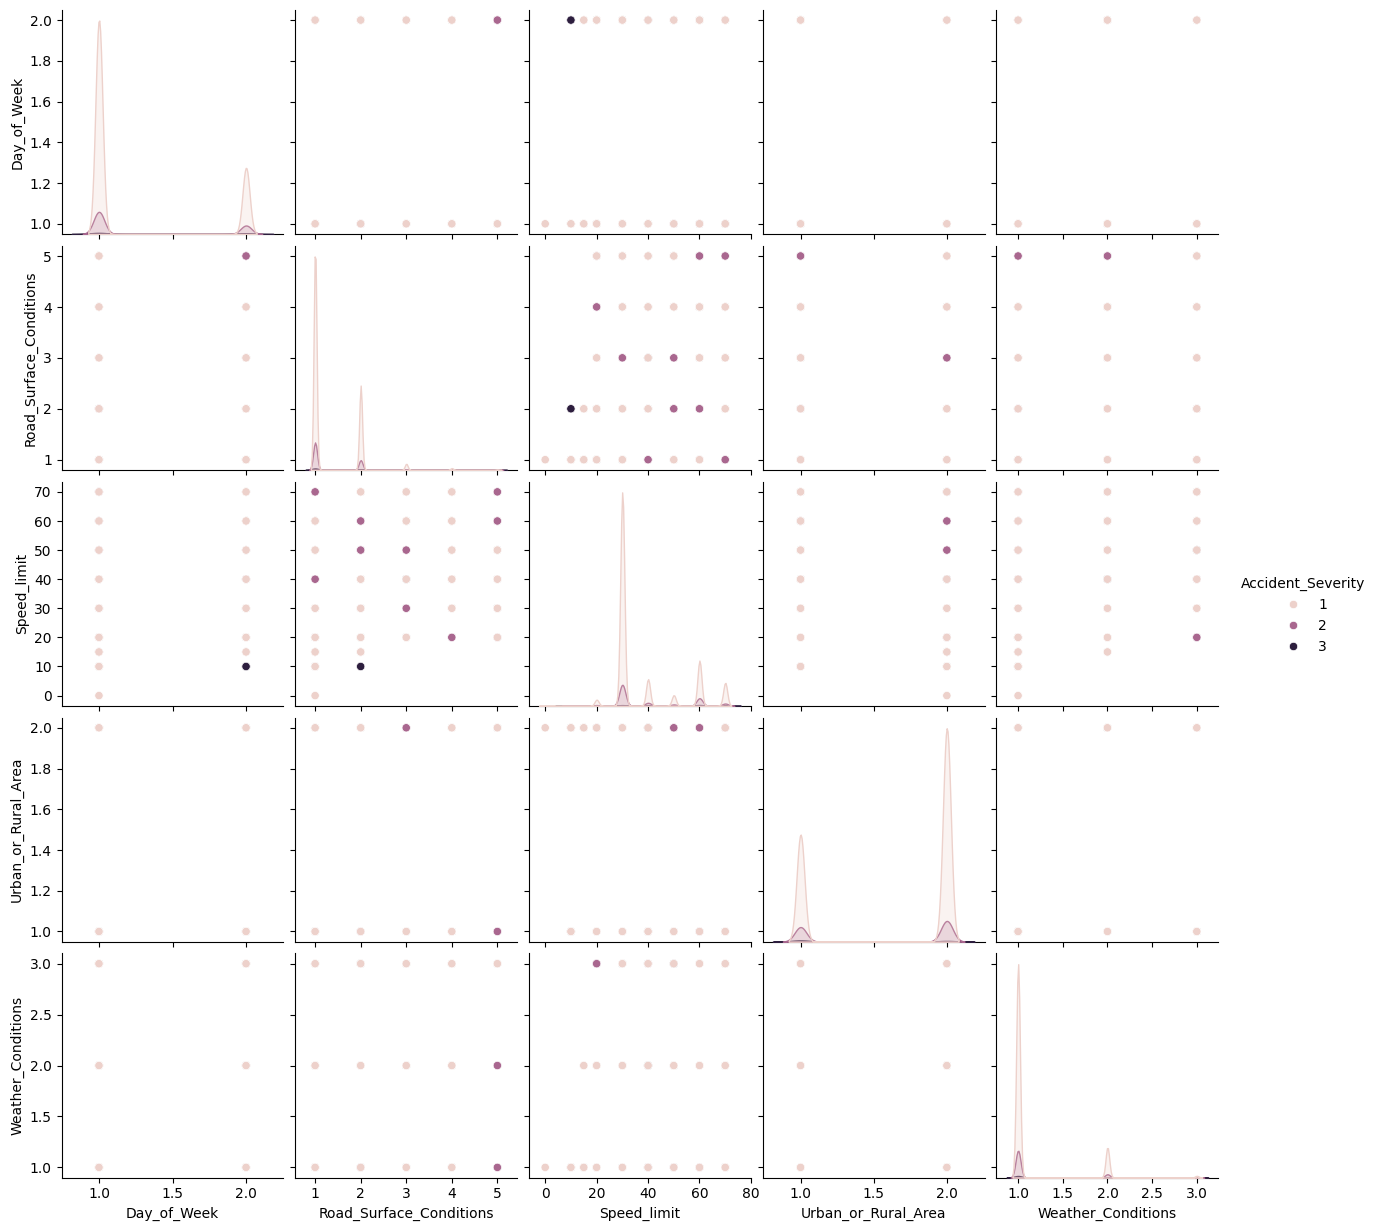

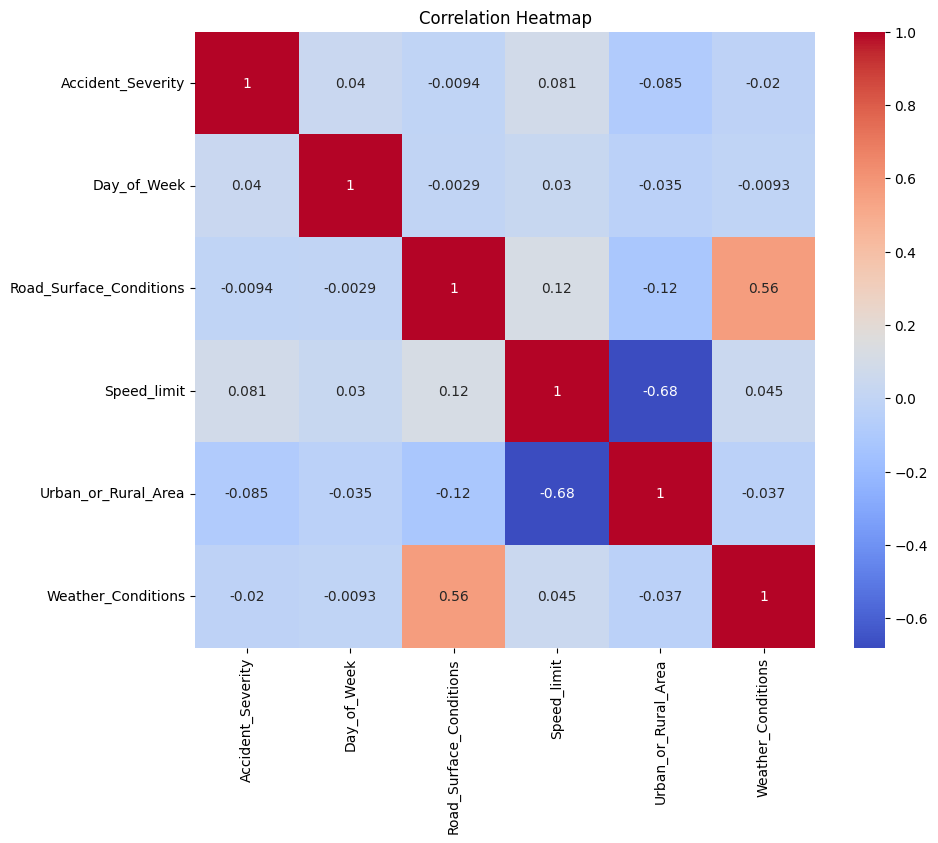

In [9]:
# EDA: Pairplot
sns.pairplot(data, hue='Accident_Severity', diag_kind='kde')
plt.show()

# EDA: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [11]:
y_pred = clf.predict(X_test)
print(y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))


accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
print(accuracy)

[1 1 1 ... 1 1 1]
[[334165      0      0]
 [ 55614      0      0]
 [  5041      0      0]]
              precision    recall  f1-score   support

           1       0.85      1.00      0.92    334165
           2       1.00      0.00      0.00     55614
           3       1.00      0.00      0.00      5041

    accuracy                           0.85    394820
   macro avg       0.95      0.33      0.31    394820
weighted avg       0.87      0.85      0.78    394820

0.846373030748189


In [12]:
# Combine test features, actual target values, and predicted values into a DataFrame
results_df = X_test.copy()
results_df['Actual'] = y_test
results_df['Predicted'] = y_pred

# Display a subset of the DataFrame for presentation (e.g., first 15 rows)
print(results_df.head(12))

         Day_of_Week  Road_Surface_Conditions  Speed_limit  \
1866765            1                      1.0         70.0   
1778225            2                      2.0         30.0   
1264140            1                      1.0         30.0   
286718             1                      2.0         60.0   
1467193            1                      2.0         40.0   
1224860            1                      2.0         70.0   
1093043            1                      1.0         30.0   
1757407            1                      2.0         70.0   
1813987            2                      2.0         30.0   
934589             2                      1.0         30.0   
1791428            1                      1.0         30.0   
1743150            1                      1.0         30.0   

         Urban_or_Rural_Area  Weather_Conditions  Actual  Predicted  
1866765                  1.0                 1.0       1          1  
1778225                  2.0                 1.0     